In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast 

# import os
# if os.name == 'posix' :
#     plt.rc('font', family='AppleGothic')
# else :
#     plt.rc('font', family='Malgun Gothic')
    
plt.rc('axes', unicode_minus=False)

plt.rcParams['font.family'] = 'NanumGothic' 
plt.rcParams['axes.unicode_minus'] = False
import koreanize_matplotlib

## 데이터 불러오기

In [52]:
user_df = pd.read_parquet('./votes/accounts_user.parquet')
user_df.head()

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0


In [53]:
userquestion_df = pd.read_parquet('./votes/accounts_userquestionrecord.parquet')
userquestion_df.head()

,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
0,771777,C,2023-04-28 12:27:49,849469,252,849436,998458,0,N,2023-04-28 12:27:49,0,0
1,771800,C,2023-04-28 12:28:02,849446,244,849436,998459,0,N,2023-04-28 12:28:02,0,0
2,771812,C,2023-04-28 12:28:09,849454,183,849436,998460,1,N,2023-04-28 12:28:09,0,0
3,771828,C,2023-04-28 12:28:16,847375,101,849436,998461,0,N,2023-04-28 12:28:16,0,0
4,771851,C,2023-04-28 12:28:26,849477,209,849436,998462,1,N,2023-04-28 12:28:26,0,0


In [54]:
userquestion_567_df = userquestion_df[(userquestion_df['created_at']>='2023-05-01') & (userquestion_df['created_at']<'2023-08-01')]

In [55]:
school_df = pd.read_parquet('./votes/accounts_school.parquet')
school_df.head()

,id,address,student_count,school_type
0,4,충청북도 충주시,239,H
1,5,충청북도 충주시,160,M
2,6,충청북도 충주시,200,H
3,7,충청북도 충주시,114,H
4,8,충청북도 충주시,139,M


In [56]:
group_df = pd.read_parquet('./votes/accounts_group.parquet')
group_df.head()

,id,grade,class_num,school_id
0,1,1,1,1
1,8,3,2,1
2,9,3,3,1
3,10,2,2,1
4,11,2,3,1


In [57]:
# school_id, group_id 테이블 합치기
school_group_df = pd.merge(group_df, school_df, left_on='school_id', right_on='id', how='left')
school_group_df = school_group_df.drop(columns=['class_num', 'id_y'])
school_group_df = school_group_df.rename(columns={'id_x':'group_id'})
school_group_df.head()

,group_id,grade,school_id,address,student_count,school_type
0,1,1,1,NaN,NaN,NaN
1,8,3,1,NaN,NaN,NaN
2,9,3,1,NaN,NaN,NaN
3,10,2,1,NaN,NaN,NaN
4,11,2,1,NaN,NaN,NaN


In [58]:
user_group_df = user_df[['id', 'group_id']]
user_school_df = pd.merge(user_group_df, school_group_df, on='group_id', how='left')
user_school_df.head()

,id,group_id,grade,school_id,address,student_count,school_type
0,831956,NaN,NaN,NaN,NaN,NaN,NaN
1,831962,12.0,2.0,1.0,NaN,NaN,NaN
2,832151,1.0,1.0,1.0,NaN,NaN,NaN
3,832340,1.0,1.0,1.0,NaN,NaN,NaN
4,832520,12.0,2.0,1.0,NaN,NaN,NaN


- 투표 기록 테이블에서 user_id, school_id 모두 합치기

In [59]:
# 필요한 컬럼만 뽑기
userquestion_567_df = userquestion_567_df[['id', 'status', 'created_at', 'chosen_user_id', 'question_id', 'user_id', 'question_piece_id', 'has_read', 'answer_status']]
# user_id, school_id 모두 합치기
user_question_school_df = pd.merge(userquestion_567_df, user_school_df, left_on='user_id', right_on='id', how='left')
user_question_school_df.head()

,id_x,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,id_y,group_id,grade,school_id,address,student_count,school_type
0,1481996,C,2023-05-01 03:37:42,855817,202,857913,1821408,0,N,857913,5691.0,1.0,271.0,충청남도 천안시 서북구,491.0,H
1,1482200,C,2023-05-01 03:38:24,855549,116,856430,1861799,0,N,856430,4296.0,1.0,271.0,충청남도 천안시 서북구,491.0,H
2,1482273,C,2023-05-01 03:38:38,855509,199,856430,1861800,0,N,856430,4296.0,1.0,271.0,충청남도 천안시 서북구,491.0,H
3,1482321,C,2023-05-01 03:38:48,855509,238,856430,1861801,0,N,856430,4296.0,1.0,271.0,충청남도 천안시 서북구,491.0,H
4,1482347,C,2023-05-01 03:38:53,860439,190,856430,1861802,0,N,856430,4296.0,1.0,271.0,충청남도 천안시 서북구,491.0,H


## 투표율 구하기

In [60]:
user_question_school_df['school_id'].value_counts()

school_id
1719.0    159515
5520.0    153179
4426.0    132913
5491.0    119462
369.0     117719
4516.0    114636
5372.0    107543
1478.0    105895
271.0      86492
352.0      84064
Name: count, dtype: int64

In [61]:
user_question_school_df['user_id'].nunique()

4835

In [62]:
# 해당 학생들로만 데이터 분석하기 위해서 user_id 리스트로 뽑기
user_list = list(user_question_school_df['user_id'].unique())
user_list

[857913,
 856430,
 856252,
 858265,
 858467,
 856197,
 855825,
 855817,
 849922,
 850344,
 850180,
 849528,
 858674,
 850096,
 850615,
 850475,
 855891,
 850737,
 856446,
 863069,
 854615,
 856002,
 857051,
 851491,
 855694,
 857101,
 850130,
 855245,
 850948,
 857797,
 855869,
 856736,
 859641,
 855514,
 855424,
 855810,
 853741,
 855110,
 856181,
 858253,
 855752,
 856779,
 856962,
 862143,
 854494,
 858623,
 855743,
 851144,
 850190,
 852305,
 860280,
 861223,
 856875,
 857926,
 857609,
 855809,
 857684,
 856828,
 858358,
 857610,
 860697,
 857793,
 850319,
 849454,
 863154,
 849503,
 849543,
 849487,
 850986,
 856904,
 855737,
 863211,
 849979,
 855832,
 850601,
 849497,
 852636,
 855720,
 850150,
 850736,
 858836,
 851556,
 850574,
 850215,
 855993,
 850112,
 851717,
 849692,
 861058,
 852044,
 849451,
 851835,
 849436,
 851396,
 850761,
 849103,
 850249,
 849479,
 849512,
 858328,
 850229,
 849620,
 850866,
 861995,
 857422,
 856972,
 850152,
 855914,
 856062,
 850098,
 856350,
 

- 누적 회원가입 구하기

In [63]:
# 누적 회원가입 구하기 위해서 우선 필요한 컬럼만 뽑기
user_join_df =  user_df[['id', 'created_at']]
user_join_df.head()

,id,created_at
0,831956,2023-03-29 03:44:14.047130
1,831962,2023-03-29 05:18:56.162368
2,832151,2023-03-29 12:56:34.989468
3,832340,2023-03-29 12:56:35.020790
4,832520,2023-03-29 12:56:35.049311


In [64]:
# 10개 학교 학생들로만 구성되도록 데이터 정제하기
user_join_df = user_join_df[user_join_df['id'].isin(user_list)]
# 연-월-일 컬럼 뽑기
user_join_df['year_month_day'] = user_join_df['created_at'].dt.strftime('%Y-%m-%d')
user_join_df.head()

,id,created_at,year_month_day
396,838023,2023-04-19 09:06:00.719792,2023-04-19
633,838466,2023-04-19 15:10:56.560337,2023-04-19
1252,839357,2023-04-20 14:26:20.479856,2023-04-20
1889,840293,2023-04-21 11:45:56.750174,2023-04-21
2024,840473,2023-04-21 13:45:13.007506,2023-04-21


In [65]:
user_join_df['id'].duplicated().sum()

0

In [66]:
# 일별 회원가입 수 확인
user_join_cnt_df = user_join_df.groupby(['year_month_day']).size().reset_index(name='daily_join_cnt')
# 누적 회원 수 컬럼 생성
user_join_cnt_df['total_user'] = user_join_cnt_df['daily_join_cnt'].cumsum()
# 5~7월만 보기
user_join_cnt_df = user_join_cnt_df[(user_join_cnt_df['year_month_day'] >= '2023-05-01') & (user_join_cnt_df['year_month_day'] < '2023-08-01')]
user_join_cnt_df.head()

,year_month_day,daily_join_cnt,total_user
11,2023-05-01,41,425
12,2023-05-02,97,522
13,2023-05-03,382,904
14,2023-05-04,173,1077
15,2023-05-05,417,1494


- 일별 투표한 유저 수 구하기

In [67]:
# 연-월-일 컬럼 생성
user_question_school_df['year_month_day'] = user_question_school_df['created_at'].dt.strftime('%Y-%m-%d')
# 일별 투표자 수
daily_question_df = user_question_school_df.groupby(['year_month_day'])['user_id'].nunique()
daily_question_df.head()

year_month_day
2023-05-01     325
2023-05-02     413
2023-05-03     756
2023-05-04     820
2023-05-05    1248
Name: user_id, dtype: int64

In [68]:
# 데이터프레임 형태로 만들어서 합치기
daily_question_df = daily_question_df.reset_index(name='daily_question_user_cnt')

user_join_cnt_df = pd.merge(user_join_cnt_df, daily_question_df,on='year_month_day', how='left')
user_join_cnt_df.head()

,year_month_day,daily_join_cnt,total_user,daily_question_user_cnt
0,2023-05-01,41,425,325
1,2023-05-02,97,522,413
2,2023-05-03,382,904,756
3,2023-05-04,173,1077,820
4,2023-05-05,417,1494,1248


In [69]:
# 일별 투표율 구하기
user_join_cnt_df['vote_rate'] = user_join_cnt_df['daily_question_user_cnt'] / user_join_cnt_df['total_user']
user_join_cnt_df.head()

,year_month_day,daily_join_cnt,total_user,daily_question_user_cnt,vote_rate
0,2023-05-01,41,425,325,0.764706
1,2023-05-02,97,522,413,0.791188
2,2023-05-03,382,904,756,0.836283
3,2023-05-04,173,1077,820,0.761374
4,2023-05-05,417,1494,1248,0.835341


In [70]:
user_join_cnt_df.describe()

,daily_join_cnt,total_user,daily_question_user_cnt,vote_rate
count,50.000000,50.00000,50.000000,50.000000
mean,89.020000,3898.52000,946.400000,0.325724
std,116.568538,1349.08925,665.261741,0.270871
min,1.000000,425.00000,9.000000,0.001861
25%,2.000000,3476.25000,287.500000,0.061116
50%,24.500000,4725.50000,973.500000,0.276125
75%,153.500000,4818.75000,1374.250000,0.557184
max,417.000000,4835.00000,2101.000000,0.836283


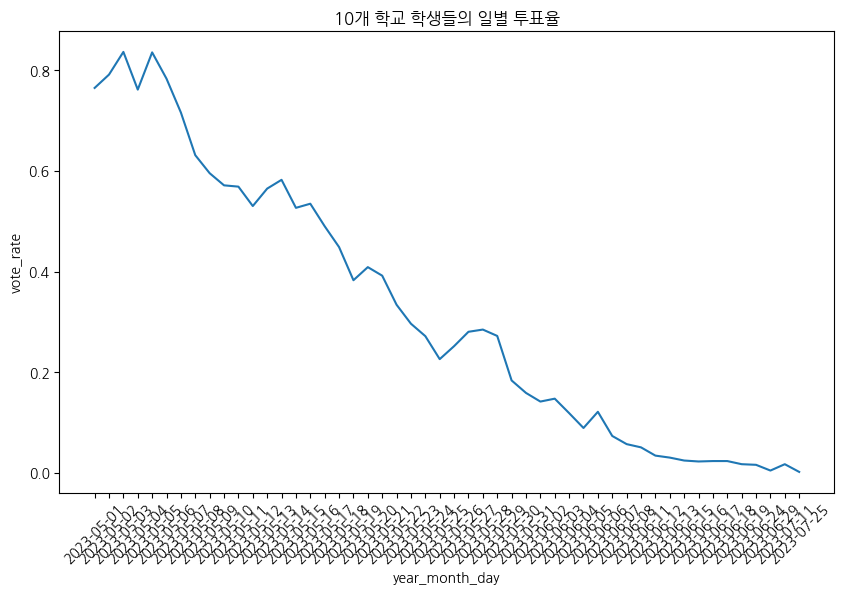

In [71]:
plt.figure(figsize=(10,6))
sns.lineplot(data=user_join_cnt_df,  x='year_month_day', y='vote_rate')
plt.title('10개 학교 학생들의 일별 투표율')
plt.xticks(rotation=45)
plt.show()

- 분모의 가입자는 계속 늘어남. 누적 가입 인원이기 때문에
- 투표율이 줄어드는 것은 어쨌든, 서비스에 지속적인 흥미를 느끼지 못하고 유저들이 앱에 들어왔으나 투표를 안하고 나갔거나 / 단발성으로 회원가입 후 한두번 투표 해보고 재방문을 안했다는 의미

In [72]:
# 유저별 투표 횟수 확인해보기
user_vote_cnt_df = user_question_school_df.groupby(['user_id']).size().reset_index(name='vote_cnt')
user_vote_cnt_df['vote_cnt'].describe()

count    4835.000000
mean      244.347053
std       224.956684
min         1.000000
25%        88.000000
50%       183.000000
75%       330.500000
max      2424.000000
Name: vote_cnt, dtype: float64

In [73]:
user_question_school_df.head()

,id_x,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,id_y,group_id,grade,school_id,address,student_count,school_type,year_month_day
0,1481996,C,2023-05-01 03:37:42,855817,202,857913,1821408,0,N,857913,5691.0,1.0,271.0,충청남도 천안시 서북구,491.0,H,2023-05-01
1,1482200,C,2023-05-01 03:38:24,855549,116,856430,1861799,0,N,856430,4296.0,1.0,271.0,충청남도 천안시 서북구,491.0,H,2023-05-01
2,1482273,C,2023-05-01 03:38:38,855509,199,856430,1861800,0,N,856430,4296.0,1.0,271.0,충청남도 천안시 서북구,491.0,H,2023-05-01
3,1482321,C,2023-05-01 03:38:48,855509,238,856430,1861801,0,N,856430,4296.0,1.0,271.0,충청남도 천안시 서북구,491.0,H,2023-05-01
4,1482347,C,2023-05-01 03:38:53,860439,190,856430,1861802,0,N,856430,4296.0,1.0,271.0,충청남도 천안시 서북구,491.0,H,2023-05-01


In [ ]:
# 유저별 투표 일자 확인
grouped = user_question_school_df.groupby(['user_id', 'year_month_day']).size().reset_index(name='count')

In [ ]:
# 유저별 몇번째 투표일인지 나타내기
grouped['visit_order'] = (
    grouped
    .groupby('user_id')
    .cumcount() + 1
)

In [ ]:
# 결과
grouped

,user_id,year_month_day,count,visit_order
0,838023,2023-05-02,1,1
1,838023,2023-05-03,10,2
2,838023,2023-05-04,4,3
3,838466,2023-05-02,9,1
4,838466,2023-05-03,34,2
...,...,...,...,...
49569,1579418,2023-07-25,9,1
49570,1579418,2023-07-26,17,2
49571,1579418,2023-07-28,7,3
49572,1579418,2023-07-29,7,4


In [ ]:
# 재투표인 사람들만 확인하기
visit_again_df = grouped[grouped['visit_order'] > 1]

# 재투표 유저 데이터만 모아둔거에서, 일자별로 몇명이 재투표한건지 확인해보기
visit_again_df = visit_again_df.groupby(['year_month_day'])['user_id'].nunique().reset_index(name='visit_again_cnt')
visit_again_df.head()

,year_month_day,visit_again_cnt
0,2023-05-02,310
1,2023-05-03,368
2,2023-05-04,652
3,2023-05-05,812
4,2023-05-06,1192


In [84]:
user_join_cnt_df.head()

,year_month_day,daily_join_cnt,total_user,daily_question_user_cnt,vote_rate
0,2023-05-01,41,425,325,0.764706
1,2023-05-02,97,522,413,0.791188
2,2023-05-03,382,904,756,0.836283
3,2023-05-04,173,1077,820,0.761374
4,2023-05-05,417,1494,1248,0.835341


In [85]:
# 투표율 데이터프레임에 합치기
user_cnt_df = pd.merge(user_join_cnt_df, visit_again_df, on='year_month_day', how='left')
user_cnt_df.head()

,year_month_day,daily_join_cnt,total_user,daily_question_user_cnt,vote_rate,visit_again_cnt
0,2023-05-01,41,425,325,0.764706,NaN
1,2023-05-02,97,522,413,0.791188,310.0
2,2023-05-03,382,904,756,0.836283,368.0
3,2023-05-04,173,1077,820,0.761374,652.0
4,2023-05-05,417,1494,1248,0.835341,812.0


In [ ]:
# 5/1은 데이터 분석 기간의 첫 날이므로 재투표율이 없는게 당연하여서 결측치 0으로 채움
# visit_again_cnt 의 결측치는 5/1 하루 뿐임
user_cnt_df['visit_again_cnt'] = user_cnt_df['visit_again_cnt'].fillna(0)
user_cnt_df.head()

,year_month_day,daily_join_cnt,total_user,daily_question_user_cnt,vote_rate,visit_again_cnt
0,2023-05-01,41,425,325,0.764706,0.0
1,2023-05-02,97,522,413,0.791188,310.0
2,2023-05-03,382,904,756,0.836283,368.0
3,2023-05-04,173,1077,820,0.761374,652.0
4,2023-05-05,417,1494,1248,0.835341,812.0


In [95]:
# 재투표 비율 구해보기
# 전체 투표한 유저 중 첫 투표가 아닌 유저 비율
user_cnt_df['again_rate'] = user_cnt_df['visit_again_cnt'] /  user_cnt_df['daily_question_user_cnt']
user_cnt_df.head()

,year_month_day,daily_join_cnt,total_user,daily_question_user_cnt,vote_rate,visit_again_cnt,again_rate
0,2023-05-01,41,425,325,0.764706,0.0,0.000000
1,2023-05-02,97,522,413,0.791188,310.0,0.750605
2,2023-05-03,382,904,756,0.836283,368.0,0.486772
3,2023-05-04,173,1077,820,0.761374,652.0,0.795122
4,2023-05-05,417,1494,1248,0.835341,812.0,0.650641


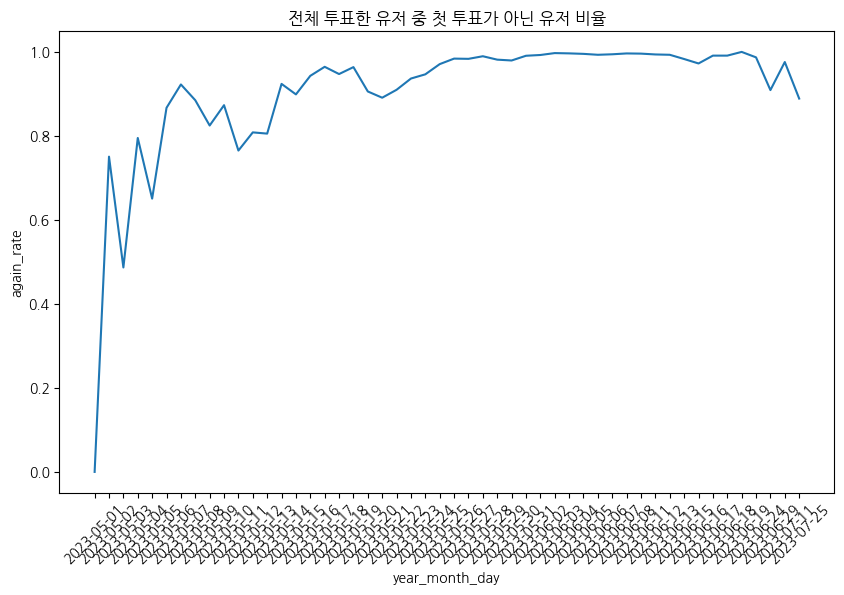

In [96]:
# 재방문 비율 시각화
plt.figure(figsize=(10,6))
sns.lineplot(data=user_cnt_df,  x='year_month_day', y='again_rate')
plt.title('전체 투표한 유저 중 첫 투표가 아닌 유저 비율')
plt.xticks(rotation=45)
plt.show()

- 리텐션 차트 확인해보기

In [97]:
# 1. 데이터 준비
df = grouped.copy()  

# 2. 각 유저의 첫 방문일 구하기 (Day 0 기준 만들기)
first_visit = df.groupby('user_id')['year_month_day'].min().reset_index()
first_visit.columns = ['user_id', 'first_day']

# 3. 원본 데이터에 Day 0 정보 붙이기
df = pd.merge(df, first_visit, on='user_id')

# 4. 각 row마다 Day N (몇일째 방문인지) 계산
df['day_number'] = (pd.to_datetime(df['year_month_day']) - pd.to_datetime(df['first_day'])).dt.days

# 5. 코호트 기준: 첫 방문일 기준으로 그룹핑
df['cohort'] = df['first_day']  # 또는 pd.to_datetime(df['first_day']).dt.strftime('%b %d') 형식도 가능

# 6. 코호트별로 각 Day에 방문한 유저 수 집계
retention = (
    df.groupby(['cohort', 'day_number'])['user_id']
    .nunique()
    .unstack(fill_value=0)
)

# 7. 각 코호트의 Day 0 유저 수로 나눠 비율(%) 계산
cohort_sizes = retention[0]
retention_rate = retention.divide(cohort_sizes, axis=0) * 100  # %로

# 8. 결과 확인
retention_rate = retention_rate.round(1)

In [98]:
retention_rate

day_number,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
cohort,,,,,,,,,,,,,,,,,,,,,
2023-05-01,100.0,95.4,87.7,70.2,70.5,68.3,60.0,47.4,39.4,36.3,...,0.0,0.6,0.0,1.2,0.6,0.3,0.9,0.9,0.6,1.2
2023-05-02,100.0,80.6,71.8,68.9,68.0,59.2,45.6,43.7,45.6,34.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.9,0.0,1.0,0.0
2023-05-03,100.0,90.2,91.8,87.4,81.7,68.0,60.6,50.0,42.0,33.2,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.8,0.0,0.0
2023-05-04,100.0,92.9,90.5,83.9,63.7,55.4,49.4,42.3,33.3,23.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-05-05,100.0,93.8,85.8,75.9,59.4,56.9,43.8,37.6,31.7,33.5,...,0.2,0.0,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0
2023-05-06,100.0,88.5,81.4,71.0,57.4,54.1,38.3,35.5,32.8,24.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-05-07,100.0,89.5,73.3,72.4,55.2,50.5,55.2,43.8,39.0,35.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-05-08,100.0,80.5,77.9,83.9,66.4,61.1,61.7,50.3,49.0,40.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-05-09,100.0,91.3,88.7,83.1,84.4,84.0,76.2,72.7,73.2,64.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


전제가 하나 있는 것 같은데, 알람을 많이 보내면, 주위 사람들이 재방문한다 < 이게 중간에 들어가 있거든요? 이거에 대한 가벼운 검증을 하고나서 씁시다. 논리적으로는 필요한 단계같음. 금희님이 보시던 push-on/off랑 같이 엮어서 보면 좋을 듯.

- `account_user` 의 `is_push_on` on / off 가 투표율에 영향을 줄까?(보는 중)
    - on이 되어있는 유저 투표율 분석
        - (일별 투표한 유저 수(`is_push_on=on` 유저만)) / (누적 가입자 수)
    - off 되어있는 유저 투표율 분석
        - (일별 투표한 유저 수(`is_push_on=off` 유저만)) / (누적 가입자 수)
    - `is_push_on=off` 유저 투표율이 특히 낮다면 → 알림 끈 유저의 재참여 전략 필요
- 새로운 질문 생성이 투표율(질문 공급 효과)에 영향을 줄까?